## Imports

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

Loading the Dataframe from the pickle file

In [18]:
letters = pd.read_pickle("letters.pickle")
letters.head(5)

,author,original_date,original_place,languages,letter_content
NATP00307,Isaac Newton,16 March 1671,England,[English],35Newton 135 Cambridg March 16th 1671. Sir The...
NATP00308,Isaac Newton,19 March 1671,England,[English],36Newton 236Trans 1672 Mr Newtons Letter to Mr...
NATP00309,Isaac Newton,c. 1672,England,[Latin],37Newton 337 Read Jan: 11: 16712 Entd. LB. 5. ...
NATP00310,Isaac Newton,13 April 1672,England,[English],38Newton 438. Trin. Coll. April 13. 72. Mr New...
NATP00311,Isaac Newton,11 June 1672,England,[English],39 Newton 5 39 June 11th 1672. Read June 12: 7...


## Data exploration

### Counting 

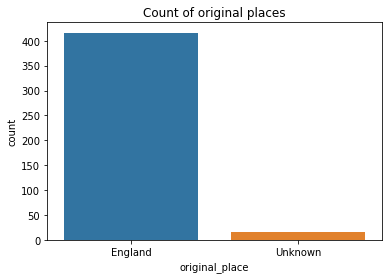

In [5]:
sns.countplot(data = letters, x = "original_place")
plt.title("Count of original places")
plt.show()

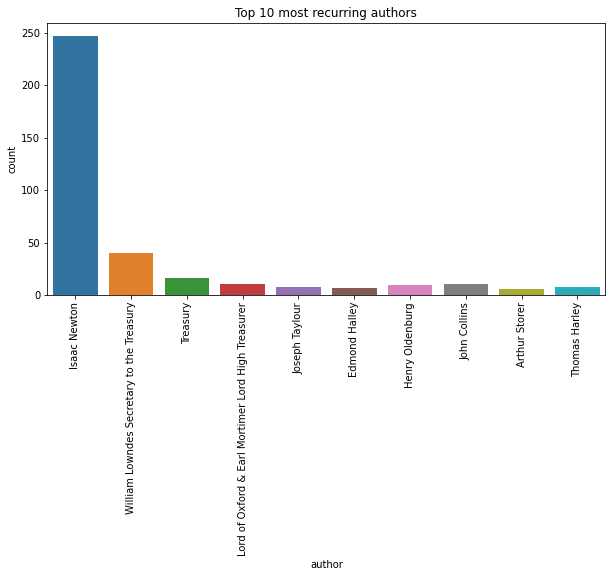

In [6]:
top_10_authors = letters.author.value_counts().index.to_list()[:10]
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = letters[letters["author"].isin(top_10_authors)], x="author")
plt.xticks(rotation="vertical")
plt.title("Top 10 most recurring authors")
plt.show()

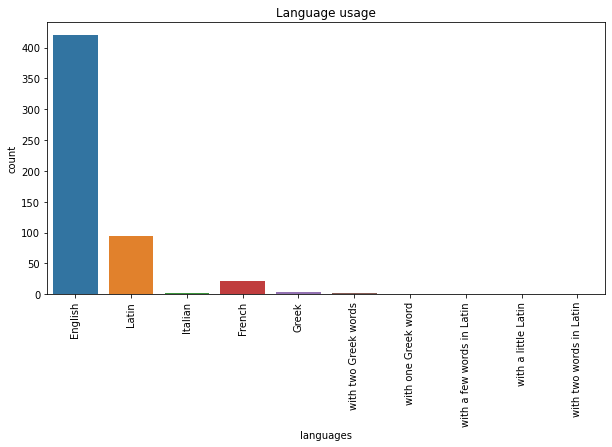

In [7]:
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = letters.explode("languages"), x = "languages")
plt.xticks(rotation="vertical")
plt.title("Language usage")
plt.show()

### Content analysis

Making a Spacy object with the first 100 letter

In [ ]:
doc = nlp(" ".join(letters[letters["languages"].apply(lambda row : "English" in row)].letter_content.values[:150]))

Counting the most reccuring words in these letters and printing the top 20 ones

In [32]:
from collections import Counter

#Without stopwords and punctuation
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words[:20])

[('Mint', 209), ('said', 174), ('Mr', 133), ('Mr.', 128), ('shall', 115), ('et', 114), ('Lordships', 100), ('Newton', 97), ('Majestys', 94), ('humbly', 87), ('Master', 73), ('ꝑper', 73), ('great', 71), ('Prism', 65), ('time', 63), ('Treasury', 59), ('Sir', 57), ('Worker', 55), ('light', 54), ('ad', 54)]
